# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels

In [4]:
data_default = pd.read_csv("C:\\Users\\apoghosyan\\Dropbox\\YSU_ML\\ISLR_Data\\default.csv", usecols = [1,2,3,4])
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
print(data_default_dummies.head(5))
np.unique(data_default_dummies.default_Yes, return_counts = True)

       balance       income  default_Yes  student_Yes
0   729.526495  44361.62507            0            0
1   817.180407  12106.13470            0            1
2  1073.549164  31767.13895            0            0
3   529.250605  35704.49394            0            0
4   785.655883  38463.49588            0            0


(array([0, 1], dtype=uint8), array([9667,  333], dtype=int64))

In [21]:
X = data_default_dummies.drop("default_Yes", axis = 1)
y = data_default_dummies.default_Yes
y = y.values
log_reg = skl_lm.LogisticRegression(max_iter=1000,tol=0.000001)
mod_log_reg = log_reg.fit(X,y)
pred_prob = mod_log_reg.predict_proba(X)
print(pred_prob.shape)

(10000, 2)
(10000,)


1

In [105]:
probs = pred_prob[:,0]

n = 10000
N = len(y)
pos = np.sum((y == 0))
neg = np.sum((y == 1))
h_list = np.linspace(0, 1, n) 
recall_list = np.array([])
precision_list = np.array([]) 
fpr_list = np.array([])

for h in h_list:
    ind = (probs > h)
    pred = np.repeat(1,N)
    pred[ind] = 0
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = pred, labels = np.array([1,0])).ravel()
    precision_list = np.append(precision_list, tp/(tp+fp))
    recall_list = np.append(recall_list, tp/pos) 
    fpr_list = np.append(fpr_list, fp/neg )

    
#print("Recall->", recall_list)
#print("Precision->", precision_list)
#print("FPR->", fpr_list)
    

C:\Users\apoghosyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in longlong_scalars


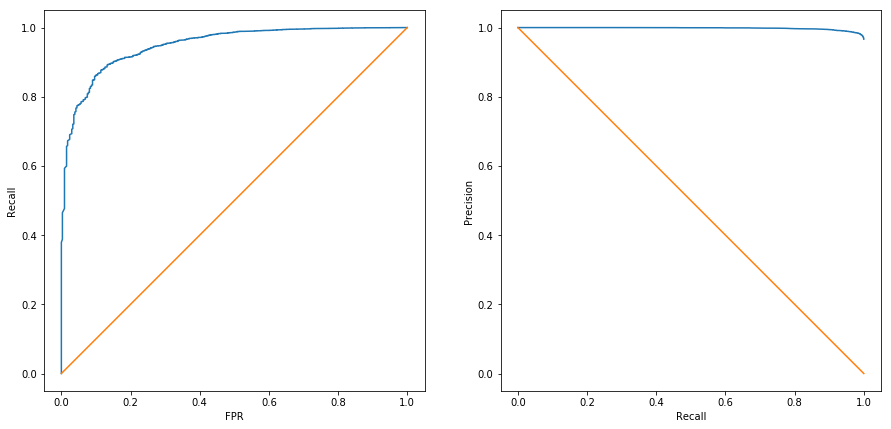

ROC-> 0.948754019355
PR-> 0.998019849196


In [106]:
nan_ind = np.isnan(precision_list) 
precision_list[nan_ind] = 1

plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
plt.plot(fpr_list, recall_list)
plt.xlabel("FPR")
plt.ylabel("Recall")
plt.plot(h_list,h_list)


plt.subplot(1,2,2)
plt.plot(recall_list, precision_list)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(h_list, -h_list + 1)

plt.show()

print("ROC->", auc(fpr_list, recall_list))
print("PR->", auc(recall_list, precision_list))

In [97]:
nan_ind = np.isnan(precision_list) 
precision_list[nan_ind] = 1

In [110]:
np.sum(np.isnan(precision_list))

0